<h1><font size=12>
Weather Derivates </h1>
<h1> Precipitation Bogota Exploration <br></h1>

Developed by [Jesus Solano](mailto:ja.solano588@uniandes.edu.co) <br>  
18 Julio 2018 


### Indices data Analysis

All datasets where downloaded from the Working group on Surface Pressure. 
[Link to full datasets](https://www.esrl.noaa.gov/psd/gcos_wgsp/Timeseries/)

##### Southern Oscillation Index (SOI)

In [1]:
########  Southern Oscillation Index (SOI) ##############

# Download the update dataset.
import os
if not os.path.exists('../datasets/soi.dat'):
    ! wget https://crudata.uea.ac.uk/cru/data/soi/soi.dat -P ../datasets/

# Import modules to read and visualize.
import pandas as pd
import numpy as np
%pylab inline

# Read dataset. We attempt to replace three spaces with two spaces to read correctly.
from io import StringIO
columnNames=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Anual']
soi=pd.read_csv(StringIO(''.join(l.replace('   ', '  ') for l in open('../datasets/soi.dat'))),sep='  ',header=None, names=columnNames, skipfooter=1  )

soiMonth=soi.drop(columns='Anual')
soiMonth.head()

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()


Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
1866 -0.62 -0.12 -0.62 -0.65  0.04 -0.82 -0.34  0.36 -0.18  0.07  1.10 -0.16
1867  0.09 -0.01 -0.09  0.83  0.50 -0.48  0.44  0.34  0.12 -0.56 -0.65 -0.89
1868 -0.16 -0.34 -1.56  0.30 -1.34 -2.20 -0.40 -1.41 -1.23 -1.24 -1.49  0.52
1869 -1.90 -0.26 -0.59  2.12  1.40  1.53  1.42  0.94  0.12  0.85  0.56  0.42
1870  1.06  0.18 -0.75  0.47 -0.11 -1.10  0.17  0.98 -0.00 -0.58 -0.86 -1.29

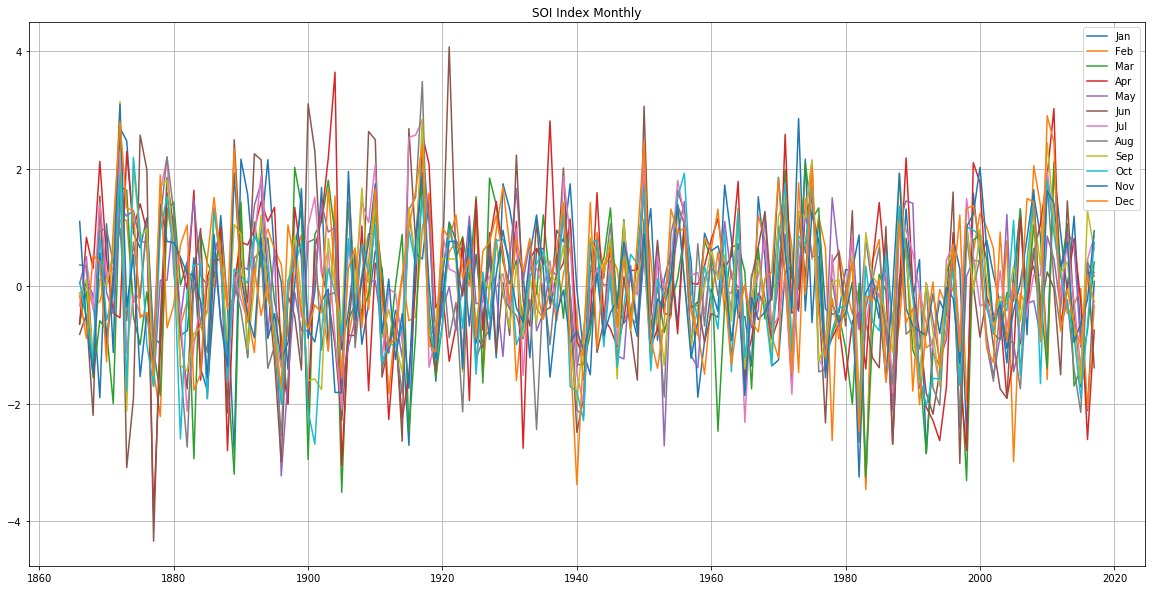

In [2]:
dates = pd.date_range('1866-01', periods=soiMonth.shape[0]*soiMonth.shape[1], freq='M')

soiMonth.plot(figsize=(20,10),grid=True, title='SOI Index Monthly')

Text(0,0.5,'Index Value')

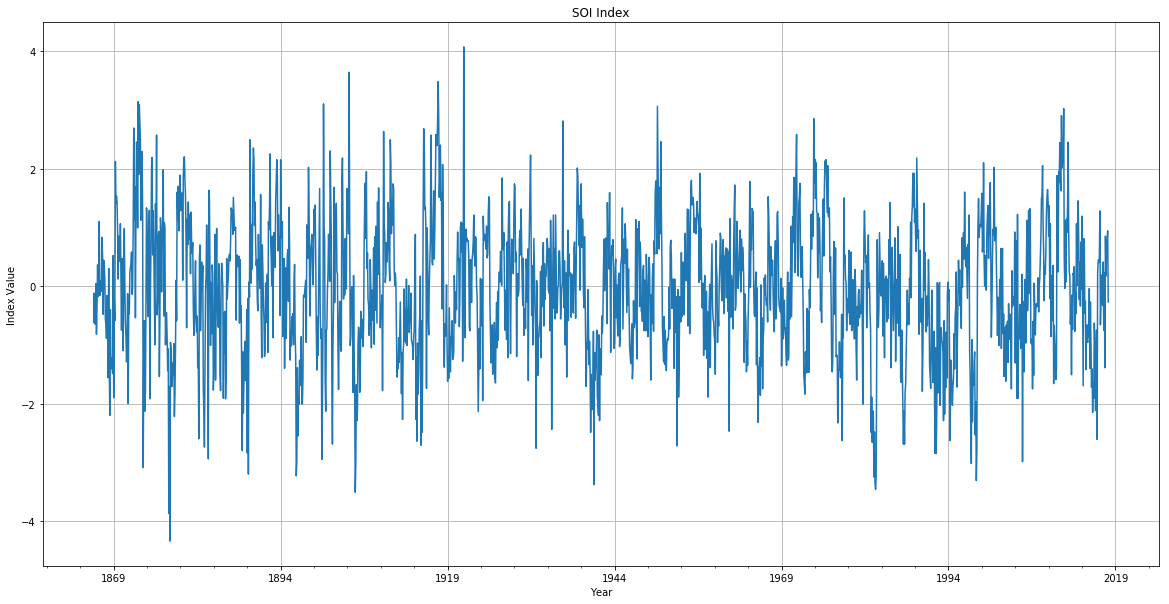

In [3]:
soiMonth.columns=range(1,13)

soiAllTime=soiMonth.stack()

soiAllTime.columns=range(1,13)
year=soiAllTime.index.get_level_values(0).values
month=soiAllTime.index.get_level_values(1).values

soiAllTime.index = pd.PeriodIndex(year=year,month=month,freq='M')

soiPlotAll = soiAllTime.plot(title='SOI Index',figsize=(20,10),grid=True)

soiPlotAll.set_xlabel('Year')
soiPlotAll.set_ylabel('Index Value')

Text(0,0.5,'Index Value')

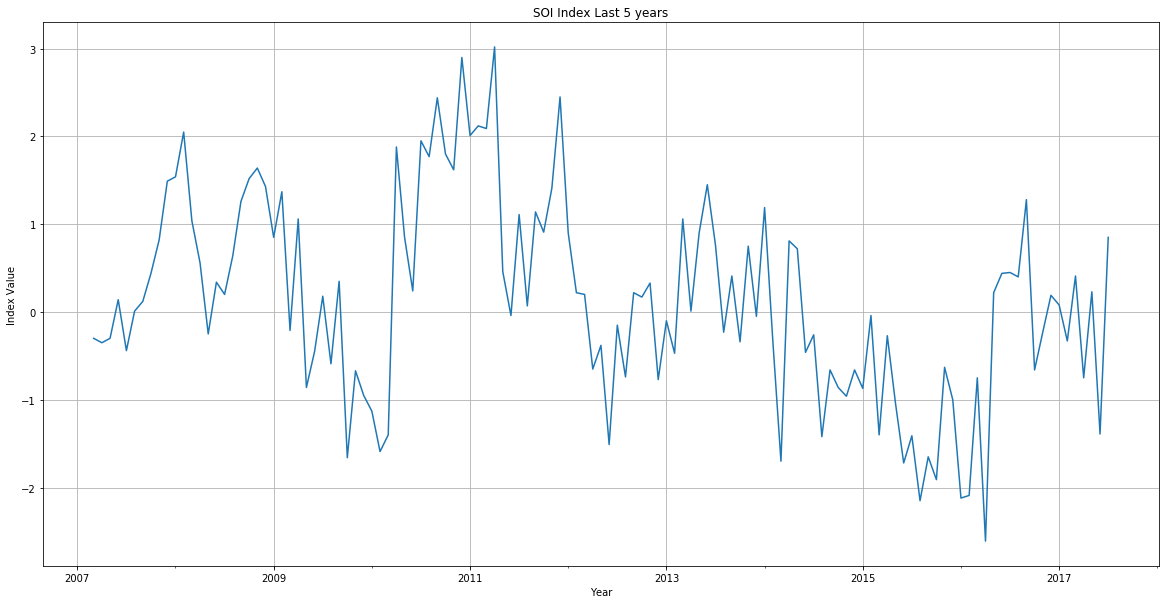

In [4]:
# Choose only last 5 years.
soiTime = pd.Series(soiAllTime.iloc[-130:-5])
soiPlot=soiTime.plot(figsize=(20,10),title='SOI Index Last 5 years',grid=True)
soiPlot.set_xlabel('Year')
soiPlot.set_ylabel('Index Value')

##### North Atlantic Oscillation (NAO)

In [5]:
########  North Atlantic Oscillation (NAO) ##############

# Download the update dataset.
import os
if not os.path.exists('../datasets/nao.dat'):
    ! wget https://crudata.uea.ac.uk/cru/data/nao/nao.dat -P ../datasets/

# Import modules to read and visualize.
import pandas as pd
import numpy as np
%pylab inline

# Read dataset. We attempt to replace three spaces with two spaces to read correctly.
from io import StringIO
columnNames=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Anual']
nao=pd.read_csv(StringIO(''.join(l.replace('   ', '  ') for l in open('../datasets/nao.dat'))),sep='  ',header=None,skiprows=[0,1,2,3,4], names=columnNames, skipfooter=1,  )

naoMonth=nao.drop(columns='Anual')
naoMonth.head()

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()


Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
1826 -3.05  4.87 -0.97  1.78 -1.20  0.83  1.89  2.72 -0.76  0.18 -2.41 -0.59
1827 -0.45 -3.72  1.83 -0.83  1.20 -0.07  2.02 -3.56 -0.07 -3.02 -1.42  2.70
1828  1.27  0.37 -0.18  0.04 -1.59 -1.33 -4.40 -2.54 -2.78  0.10 -2.57  3.04
1829 -2.48  0.32 -2.54  0.12  1.80 -0.10  0.33  0.77  0.78  0.71 -0.33 -0.43
1830 -2.33  1.20  3.58  3.08 -0.05 -0.85  3.19 -0.35  2.04  2.04  2.19 -3.13

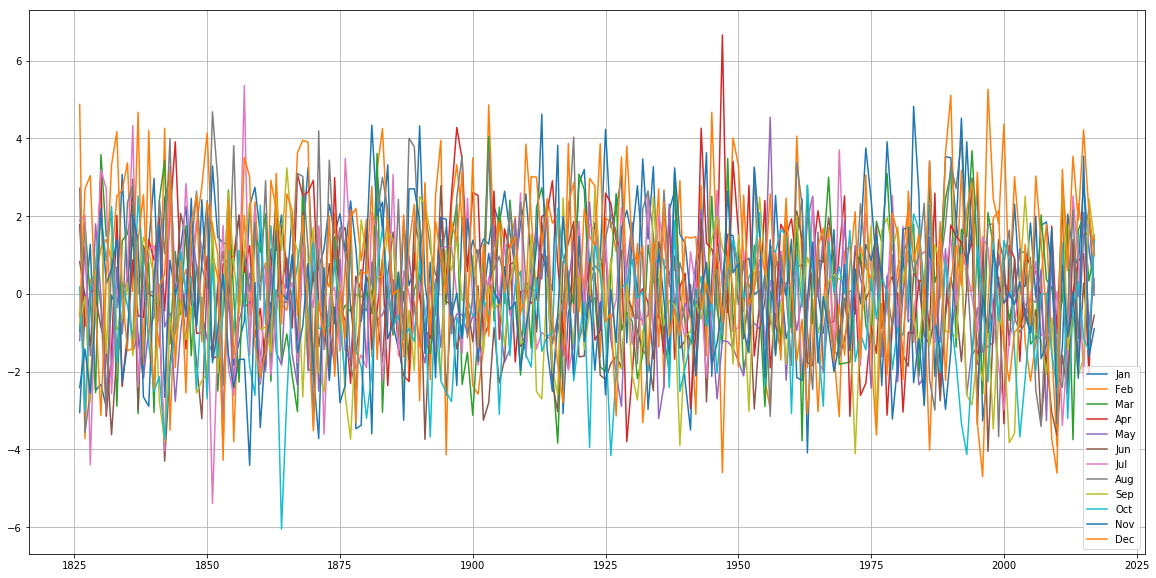

In [6]:
datesNao = pd.date_range('1826-01', periods=naoMonth.shape[0]*naoMonth.shape[1], freq='M')
naoMonth.plot(figsize=(20,10),grid=True)

Text(0,0.5,'Index Value')

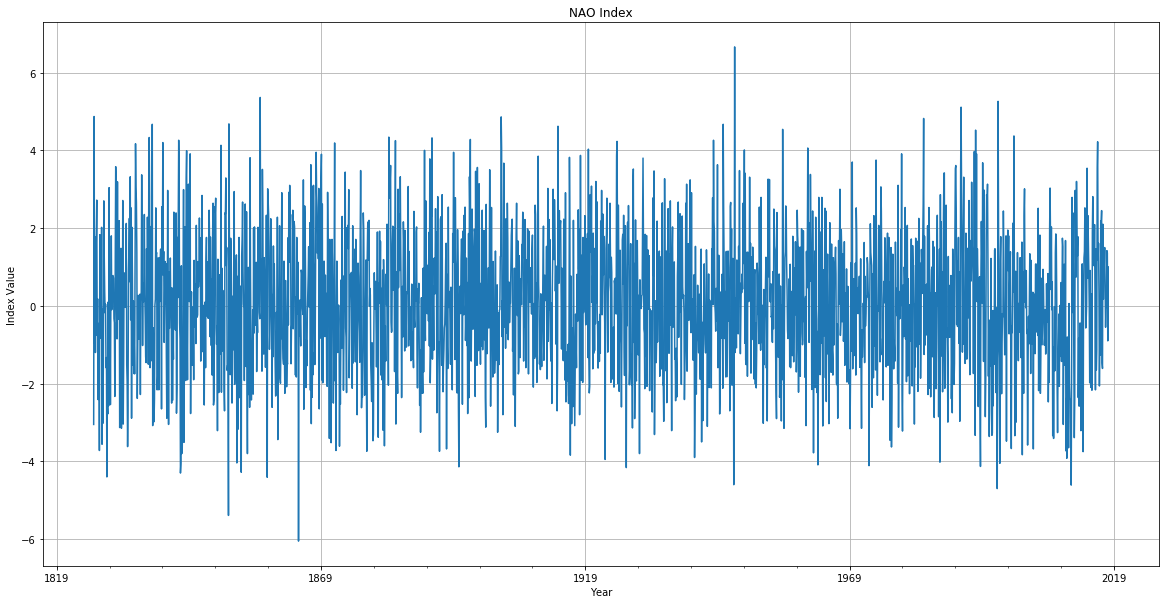

In [7]:
naoMonth.columns=range(1,13)

naoAllTime=naoMonth.stack()

naoAllTime.columns=range(1,13)
year=naoAllTime.index.get_level_values(0).values
month=naoAllTime.index.get_level_values(1).values

naoAllTime.index = pd.PeriodIndex(year=year,month=month,freq='M')

naoPlotAll= naoAllTime.plot(title='NAO Index',figsize=(20,10),grid=True)

naoPlotAll.set_xlabel('Year')
naoPlotAll.set_ylabel('Index Value')

Text(0,0.5,'Index Value')

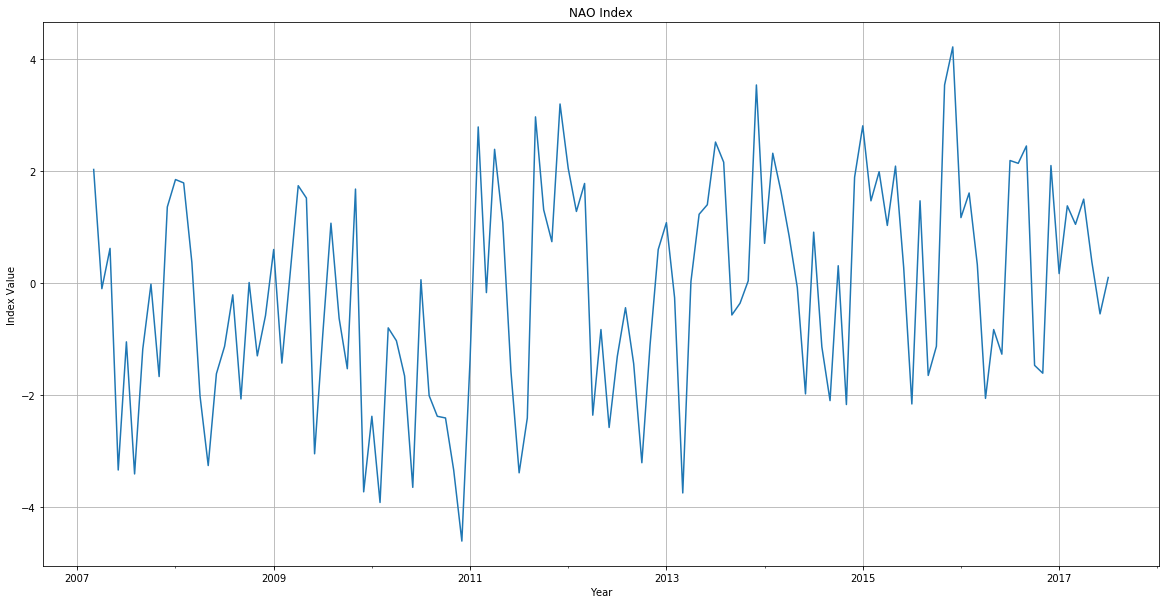

In [8]:
naoTime = pd.Series(naoAllTime.iloc[-130:-5])

naoPlot = naoTime.plot(figsize=(20,10),title='NAO Index',grid=True)

naoPlot.set_xlabel('Year')
naoPlot.set_ylabel('Index Value')

##### Niño 3.4 Index (Nino34)

In [9]:
########  Southern Oscillation Index (SOI) ##############

# Download the update dataset.
import os
if not os.path.exists('../datasets/nino34.dat'):
    ! wget https://www.esrl.noaa.gov/psd/gcos_wgsp/Timeseries/Data/nino34.long.anom.data -O ../datasets/nino34.dat

# Import modules to read and visualize.
import pandas as pd
import numpy as np
%pylab inline

# Read dataset. We attempt to replace three spaces with two spaces to read correctly.
from io import StringIO
columnNames=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
nino34=pd.read_csv(StringIO(''.join(l.replace('    ', '   ') for l in open('../datasets/nino34.dat'))),sep='   ',header=None,skiprows=[0], names=columnNames, skipfooter=8,  )
nino34Month=nino34
nino34Month.head()

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  app.launch_new_instance()


Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
1870 -1.00 -1.20 -0.83 -0.81 -1.27 -1.08 -1.04 -0.88 -0.53 -0.92 -0.79 -0.79
1871 -0.25 -0.58 -0.43 -0.50 -0.70 -0.53 -0.60 -0.33 -0.24 -0.33 -0.31 -0.58
1872 -0.72 -0.62 -0.50 -0.77 -0.62 -0.52 -0.32 -0.85 -1.02 -0.94 -0.79 -0.88
1873 -0.78 -1.01 -1.31 -0.67 -0.53 -0.48 -0.58 -0.39 -0.34 -0.78 -0.77 -0.70
1874 -0.93 -1.06 -1.40 -0.94 -0.86 -0.72 -1.00 -1.05 -1.13 -1.25 -1.33 -1.14

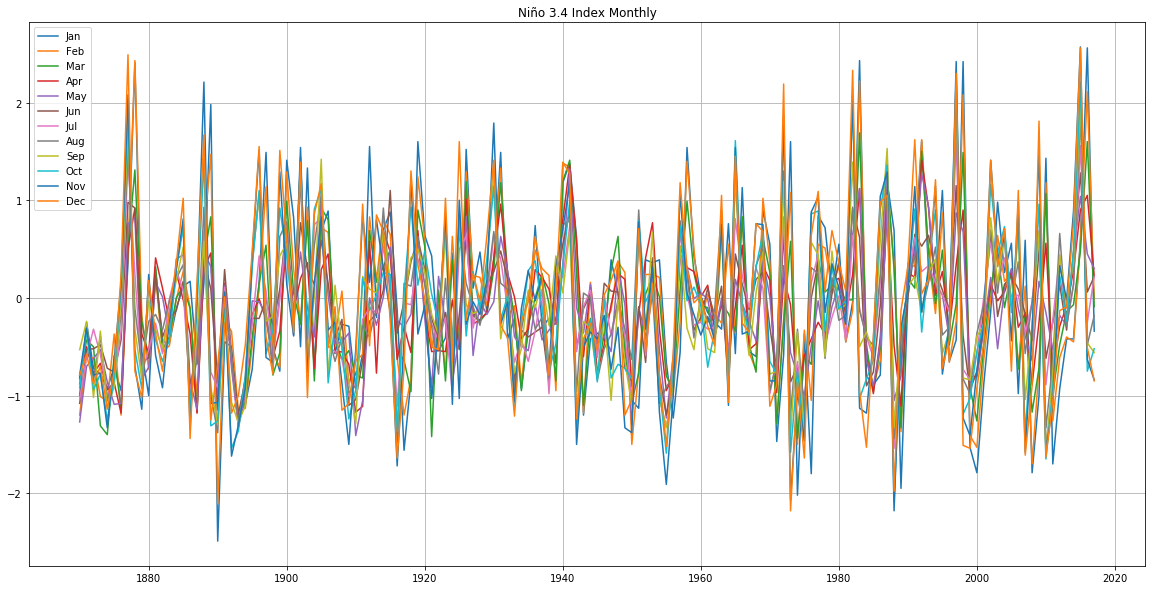

In [10]:
dates = pd.date_range('1870-01', periods=nino34Month.shape[0]*nino34Month.shape[1], freq='M')

nino34Month.plot(figsize=(20,10),grid=True, title='Niño 3.4 Index Monthly')

Text(0,0.5,'Index Value')

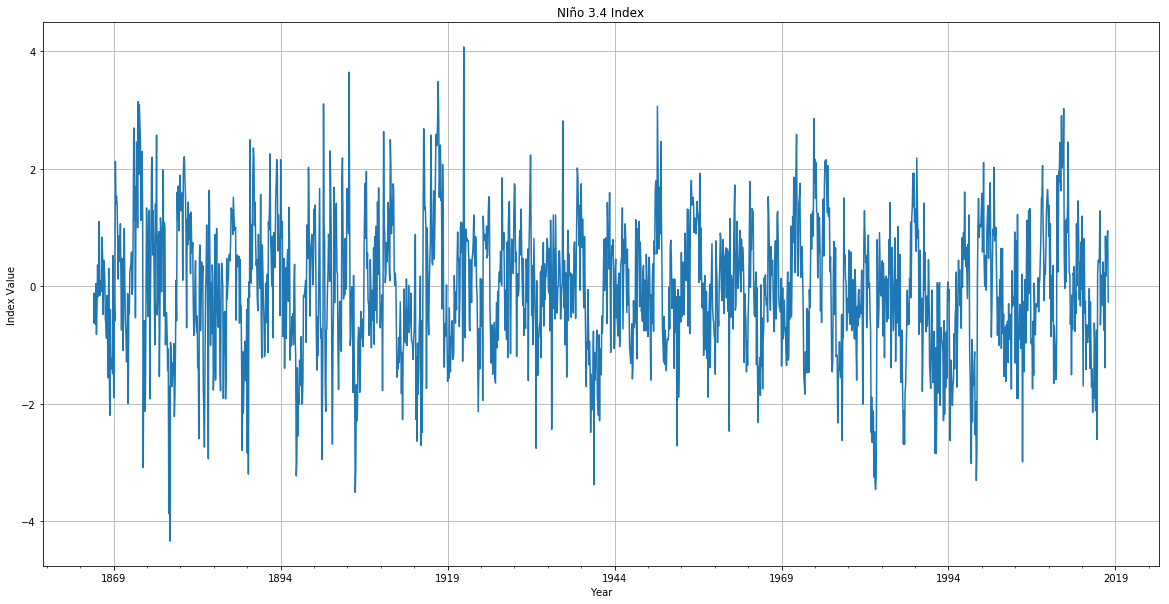

In [11]:
nino34Month.columns=range(1,13)

nino34AllTime=nino34Month.stack()

nino34AllTime.columns=range(1,13)
year=nino34AllTime.index.get_level_values(0).values
month=nino34AllTime.index.get_level_values(1).values

nino34AllTime.index = pd.PeriodIndex(year=year,month=month,freq='M')

nino34PlotAll = soiAllTime.plot(title='NIño 3.4 Index',figsize=(20,10),grid=True)

nino34PlotAll.set_xlabel('Year')
nino34PlotAll.set_ylabel('Index Value')

Text(0,0.5,'Index Value')

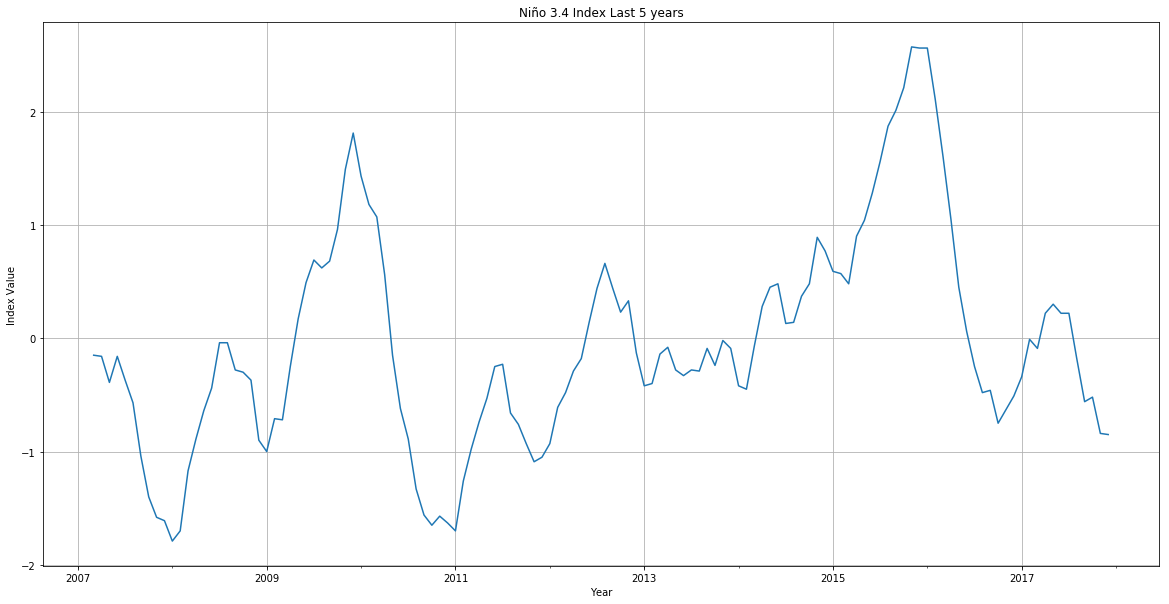

In [12]:
# Choose only last 5 years.
nino34Time = pd.Series(nino34AllTime.iloc[-130:])
nino34Plot=nino34Time.plot(figsize=(20,10),title='Niño 3.4 Index Last 5 years',grid=True)
nino34Plot.set_xlabel('Year')
nino34Plot.set_ylabel('Index Value')


## Rainfall Data Analysis

In [13]:
# Download the update dataset.
import os
if not os.path.exists('../datasets/pr_1901_2015.xls'):
    ! wget http://sdwebx.worldbank.org/climateportal/DownloadData/pr_1901_2015.xls -P ../datasets/

# Import modules to read and visualize.
import pandas as pd
import numpy as np
%pylab inline

# Read dataset. We attempt to replace three spaces with two spaces to read correctly.
from io import StringIO
columnNames=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Anual']
worldBank=pd.read_excel('../datasets/pr_1901_2015.xls',index_col=1)

worldBank.head()


Populating the interactive namespace from numpy and matplotlib


pr   Month  Country   ISO3   ISO2
\tYear                                         
1901     92.5029       1      COL    NaN    NaN
1901    108.6280       2      COL    NaN    NaN
1901    159.7820       3      COL    NaN    NaN
1901    204.2990       4      COL    NaN    NaN
1901    283.6320       5      COL    NaN    NaN

In [14]:
print(worldBank.columns)

worldBankMonth=worldBank.drop(columns=[' Country',' ISO3',' ISO2'])

datesWorldBank = pd.date_range('1901-01', periods=worldBank.shape[0], freq='M')

worldBankAllTime= pd.Series(np.asarray(worldBankMonth['pr']),index=datesWorldBank) 


Index(['pr', ' Month', ' Country', ' ISO3', ' ISO2'], dtype='object')


Text(0,0.5,'Precipitation Amount (mm)')

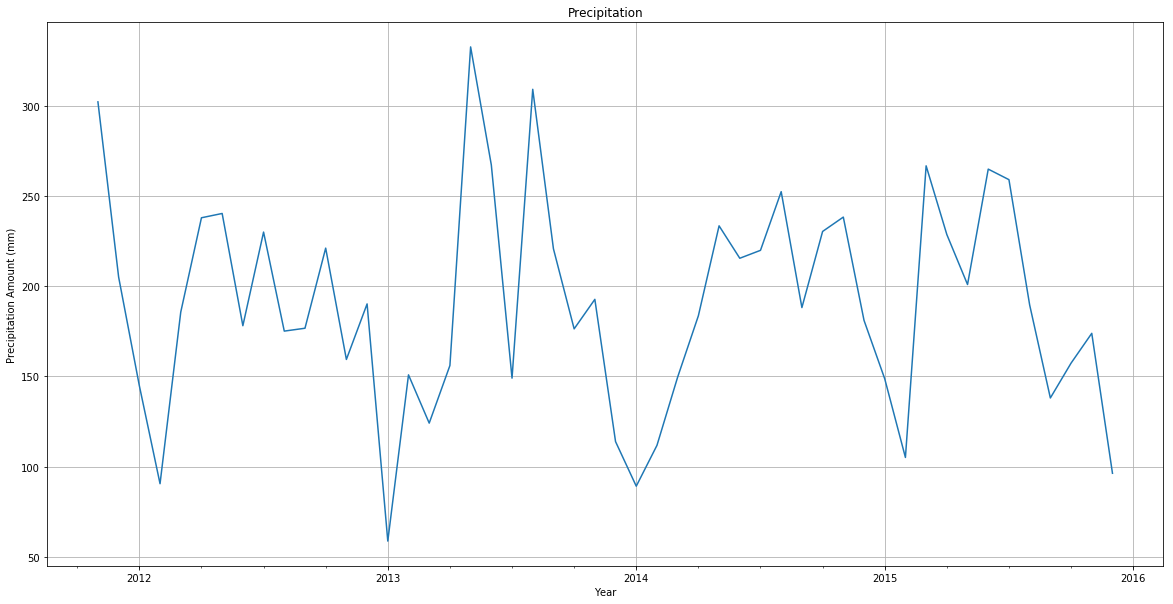

In [15]:
# Choose only 5 last years values.
worldBankTime = pd.Series(worldBankAllTime.iloc[-50:])

worldBankPlot = worldBankTime.plot(figsize=(20,10),title='Precipitation',grid=True)

worldBankPlot.set_xlabel('Year')
worldBankPlot.set_ylabel('Precipitation Amount (mm)')

## Contrasting precipitation with Climate Indices

Text(0,0.5,'Index Value')

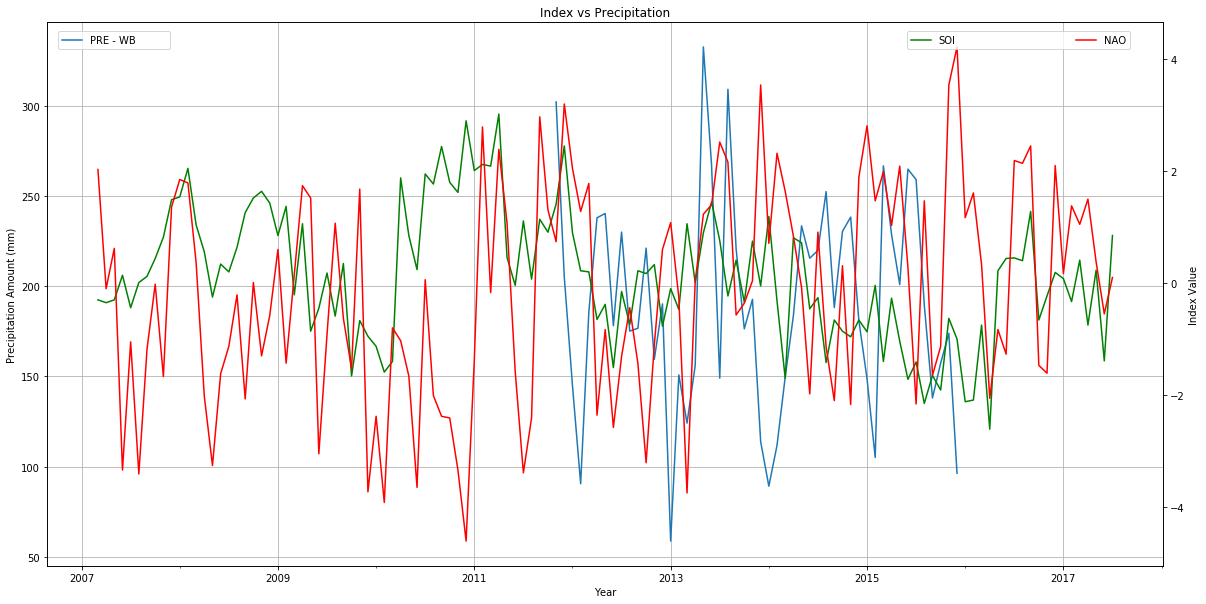

In [16]:
ax1=worldBankTime.plot(figsize=(20,10),label='PRE - WB',grid=True, title= 'Index vs Precipitation')
plt.legend(bbox_to_anchor=(0.01, 0.95, 0.1, 0.8), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
ax2= ax1.twinx()
ax2.spines['right'].set_position(('axes',1.0))

soiTime.plot(ax=ax2,color='green',label='SOI')
plt.legend(bbox_to_anchor=(0.1, 0.95, 0.2, 0.8), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
naoTime.plot(ax=ax2,color='red',label='NAO')

plt.legend(bbox_to_anchor=(0.77, 0.95, 0.2, .8), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
ax1.set_xlabel('Year')
ax1.set_ylabel('Precipitation Amount (mm)')
ax2.set_ylabel('Index Value')

## Ideam Data - Aeropuerto Guaymaral

In [106]:

# Download the update dataset.
import os
if not os.path.exists('../datasets/Precipitacion_Totales_Mensuales.csv'):
    ! wget https://www.datos.gov.co/api/views/mb4n-6m2g/rows.csv -O ../datasets/Precipitacion_Totales_Mensuales.csv 

# Import modules to read and visualize.
import pandas as pd
import numpy as np
%pylab inline

# Read dataset. We attempt to replace three spaces with two spaces to read correctly.
from io import StringIO
columnNames=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Anual']
ideamPre=pd.read_csv('../datasets/Precipitacion_Totales_Mensuales.csv')

ideamEstacion = ideamPre.loc[ideamPre['ESTACIÓN']=='Apto Gaymaral']

print(ideamEstacion.columns)
ideamEstacion.drop(['CÓDIGO','X=N','Y=E','MUNICIPIO','CUENCA','ESTACIÓN'],axis=1,inplace=True)
ideamEstacion.set_index('AÑO',drop=True,inplace=True)
ideamEstacion.head(10)

Populating the interactive namespace from numpy and matplotlib
Index(['ESTACIÓN', 'CÓDIGO', 'X=N', 'Y=E', 'MUNICIPIO', 'CUENCA', 'AÑO',
       'ENERO', 'FEBRERO', 'MARZO', 'ABRIL', 'MAYO', 'JUNIO', 'JULIO',
       'AGOSTO', 'SEPTIEMBRE', 'OCTUBRE', 'NOVIEMBRE', 'DICIEMBRE'],
      dtype='object')


/usr/local/lib/python3.5/dist-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


ENERO  FEBRERO  MARZO  ABRIL   MAYO  JUNIO  JULIO  AGOSTO  SEPTIEMBRE  \
AÑO                                                                           
1965    0.0      0.0    0.0    0.0    0.0    0.0    0.0     3.2        14.5   
1966   11.5     26.3   73.8   63.6   87.2   84.0   45.6    80.2        84.6   
1967   37.2     64.3   72.9   91.7   79.5  110.1   89.0    39.0        23.9   
1968   14.8     55.5   21.1  155.3   94.2   91.7   41.3    16.2        95.5   
1969   55.1     24.7   36.1  145.5  100.9  101.0   30.0    50.3        89.4   
1970   27.3     55.2   14.6   44.0   86.2   39.3   38.6    30.1        81.5   
1971   46.0     57.1  104.4  169.4   80.8   49.9   40.5    78.6       100.6   
1972   76.4     35.2   76.0  192.6  191.0  116.0   28.0    17.0        15.0   
1973    1.0      0.0   82.0   66.7   50.4   48.9   54.3    58.4       149.5   
1974   48.0     48.1   36.6   85.8  113.0   17.0   30.0    35.0        92.5   

      OCTUBRE  NOVIEMBRE  DICIEMBRE  
AÑO                                  
1965    116.9      124.7       67.9  
1966     70.0      183.7       71.7  
1967     62.1      104.8       25.6  
1968     91.8       71.7       16.5  
1969    174.2       94.2       35.6  
1970    155.1      109.0       31.4  
1971     69.6      105.6       72.3  
1972     37.0      127.0        9.0  
1973    100.0       69.8       90.6  
1974     72.4      105.0       28.3

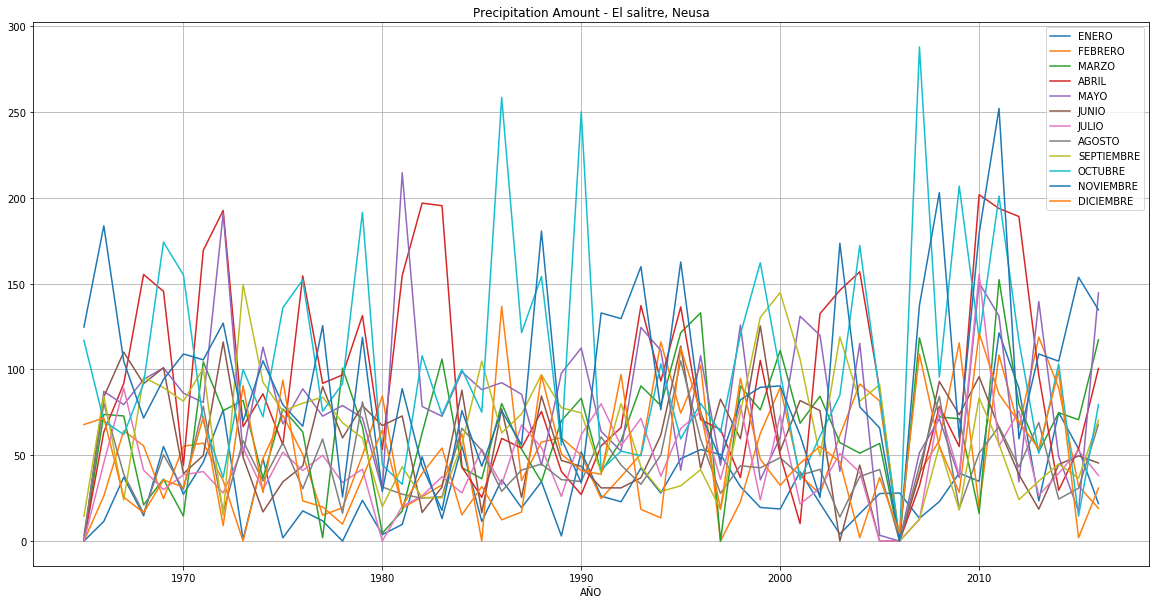

In [24]:
datesIdeamEstacion = pd.date_range('1965-01', periods=ideamEstacion.shape[0]*ideamEstacion.shape[1], freq='M')
ideamEstacion.plot(figsize=(20,10),title='Precipitation Amount - El salitre, Neusa',grid=True)

Text(0,0.5,'Amount (mm)')

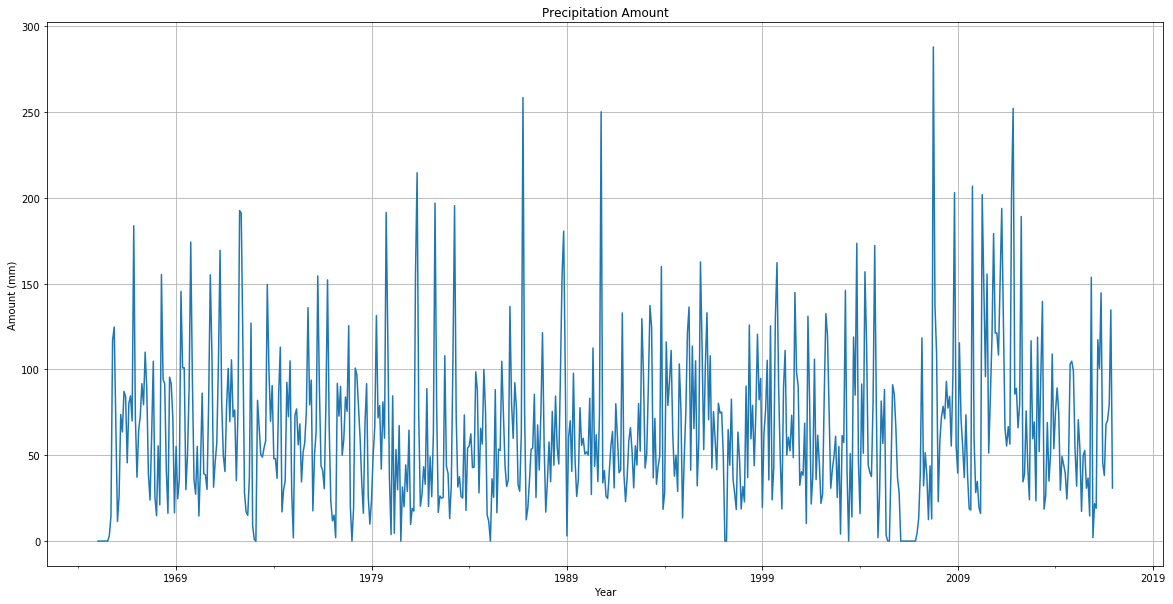

In [25]:
ideamEstacion.columns=range(1,13)

ideamEstacionAllTime=ideamEstacion.stack()

ideamEstacionAllTime.columns=range(1,13)
year=ideamEstacionAllTime.index.get_level_values(0).values
month=ideamEstacionAllTime.index.get_level_values(1).values

ideamEstacionAllTime.index = pd.PeriodIndex(year=year,month=month,freq='M')

ideamEstacionPlotAll= ideamEstacionAllTime.plot(title='Precipitation Amount',figsize=(20,10),grid=True)

ideamEstacionPlotAll.set_xlabel('Year')
ideamEstacionPlotAll.set_ylabel('Amount (mm)')

Text(0,0.5,'Amount (mm)')

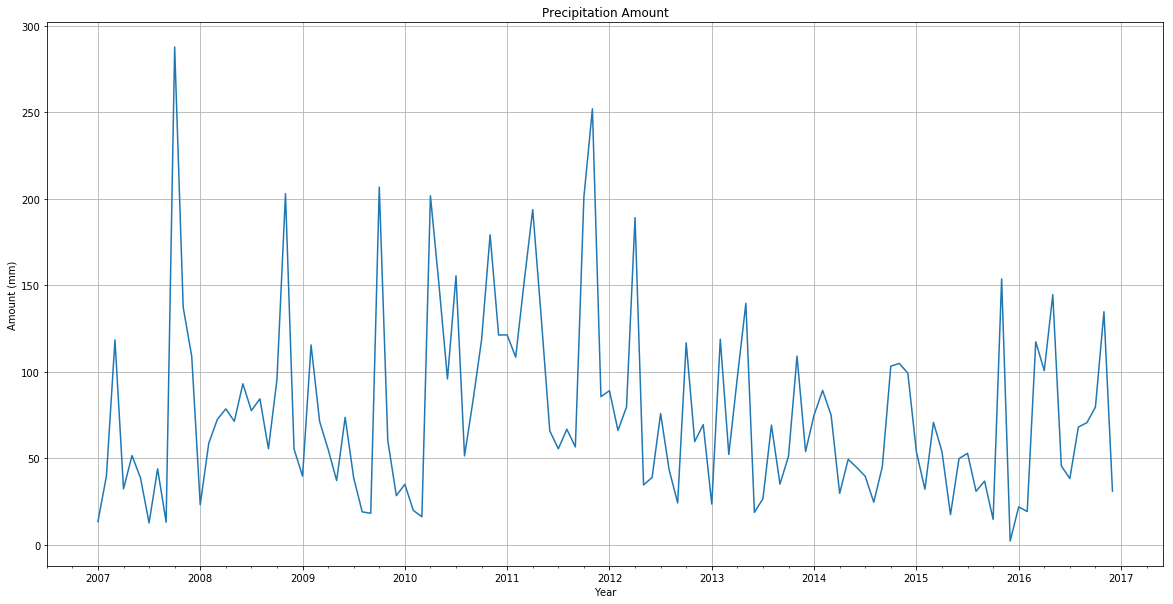

In [26]:
# Choose only last 5 years.
ideamEstacionTime = pd.Series(ideamEstacionAllTime.iloc[-120:])
ideamEstacionPlot=ideamEstacionTime.plot(figsize=(20,10),title='Precipitation Amount', grid=True)
ideamEstacionPlot.set_xlabel('Year')
ideamEstacionPlot.set_ylabel('Amount (mm)')

### Contrasting Guaymaral Values with ENSO Indices

Text(0,0.5,'Index Value')

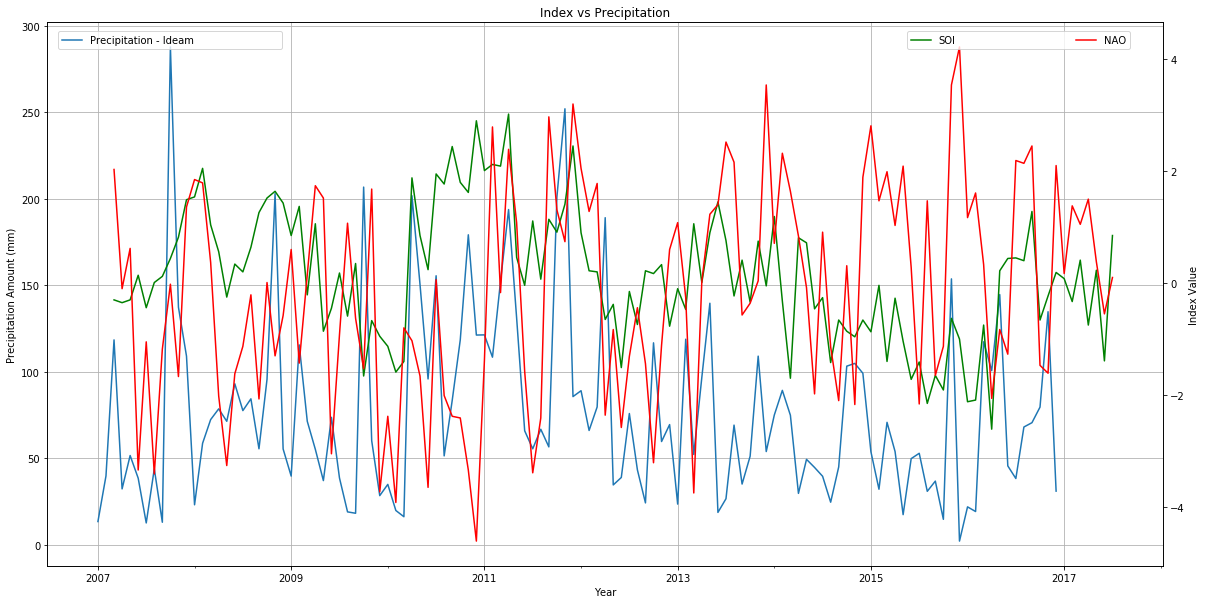

In [27]:
ax1=ideamEstacionTime.plot(figsize=(20,10),label='Precipitation - Ideam',grid=True, title= 'Index vs Precipitation')
plt.legend(bbox_to_anchor=(0.01, 0.95, 0.2, 0.8), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
ax2= ax1.twinx()
ax2.spines['right'].set_position(('axes',1.0))

soiTime.plot(ax=ax2,color='green',label='SOI')
plt.legend(bbox_to_anchor=(0.1, 0.95, 0.2, 0.8), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
naoTime.plot(ax=ax2,color='red',label='NAO')

plt.legend(bbox_to_anchor=(0.77, 0.95, 0.2, .8), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
ax1.set_xlabel('Year')
ax1.set_ylabel('Precipitation Amount (mm)')
ax2.set_ylabel('Index Value')

Text(0,0.5,'Index Value')

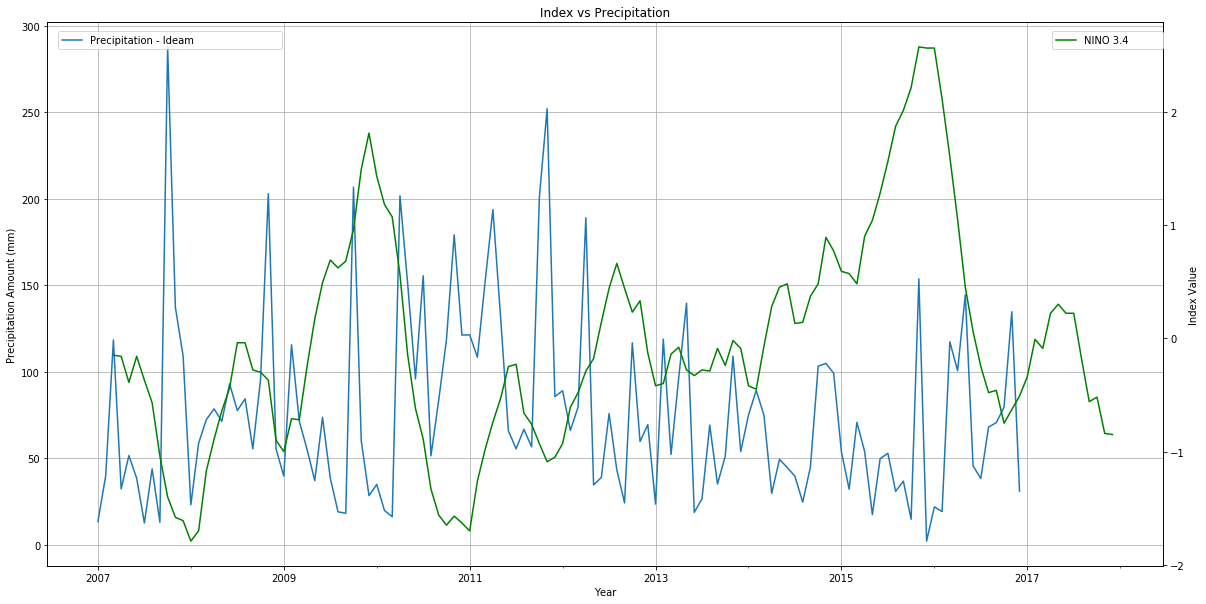

In [28]:
ax1=ideamEstacionTime.plot(figsize=(20,10),label='Precipitation - Ideam',grid=True, title= 'Index vs Precipitation')
plt.legend(bbox_to_anchor=(0.01, 0.95, 0.2, 0.8), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)
ax2= ax1.twinx()
ax2.spines['right'].set_position(('axes',1.0))

nino34Time.plot(ax=ax2,color='green',label='NINO 3.4')
plt.legend(bbox_to_anchor=(0.9, 0.95, 0.1, 0.8), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)

ax1.set_xlabel('Year')
ax1.set_ylabel('Precipitation Amount (mm)')
ax2.set_ylabel('Index Value')

# Dispersion Plots 


## SOI + Aeropuerto Guaymaral

 $ Precipitation_t$ v $Index_{t}$

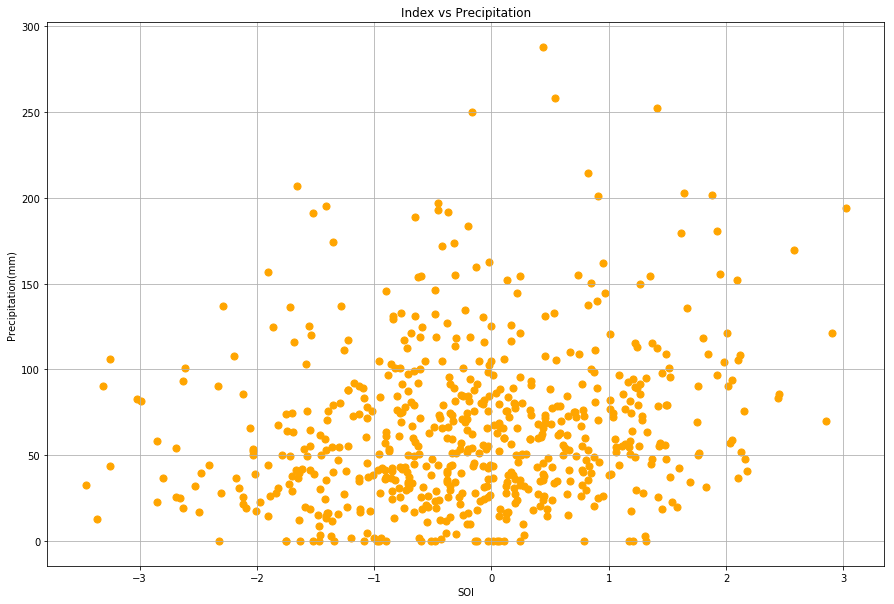

In [64]:
soiIdeamMix = pd.concat([soiAllTime,ideamEstacionAllTime],axis=1)
soiIdeamMix.set_axis(['SOI','Precipitation(mm)'],axis='columns',inplace=True)
soiIdeamMix = soiIdeamMix.dropna()
soiIdeamMix.plot.scatter(0,1,c='orange',grid=True,figsize=(15,10), title= 'Index vs Precipitation',s=50)

 $ Precipitation_t$ v $Index_{t-1}$

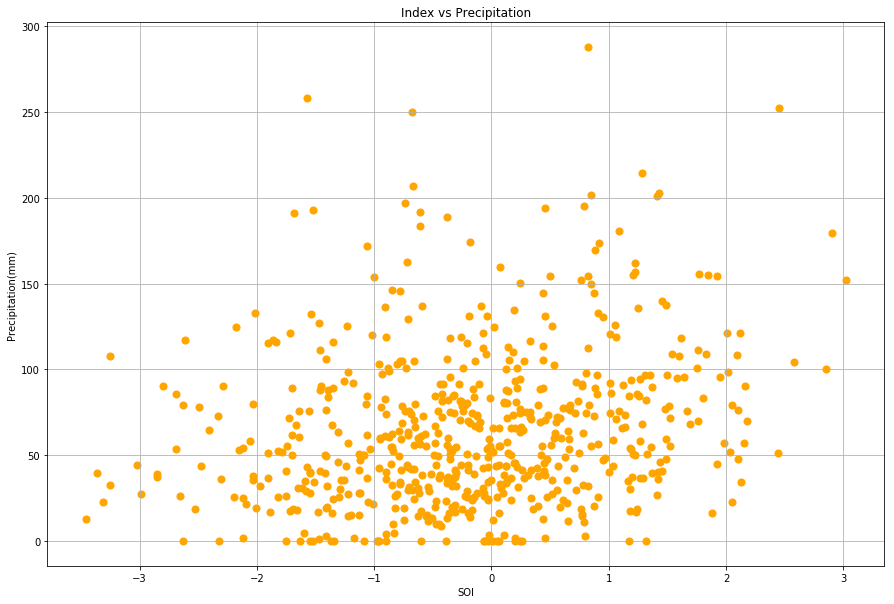

In [74]:
soiIdeamMix = pd.concat([soiAllTime.shift(-1),ideamEstacionAllTime],axis=1)
soiIdeamMix.set_axis(['SOI','Precipitation(mm)'],axis='columns',inplace=True)
soiIdeamMix = soiIdeamMix.dropna()
soiIdeamMix.plot.scatter(0,1,c='orange',grid=True,figsize=(15,10), title= 'Index vs Precipitation',s=50)

 $ Precipitation_t$ v $Index_{t-2}$

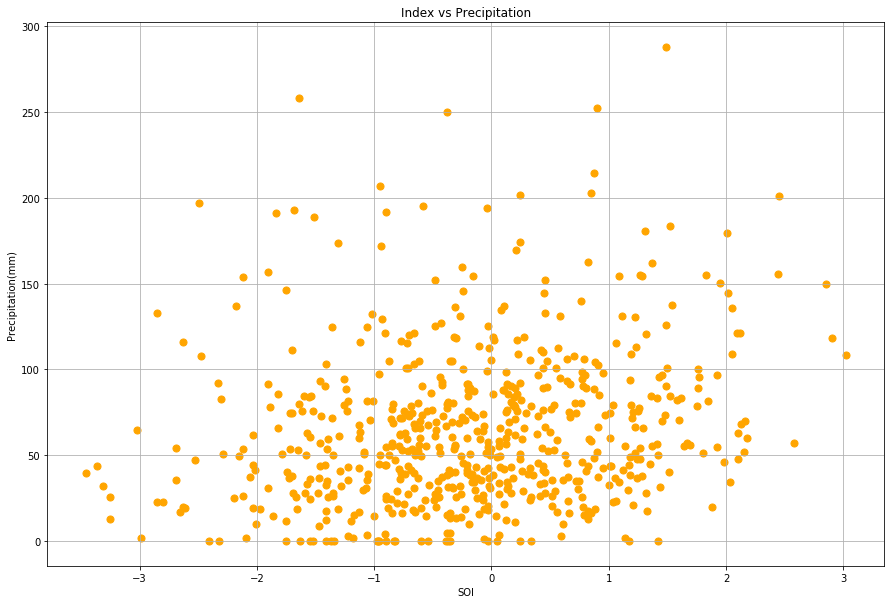

In [75]:
soiIdeamMix = pd.concat([soiAllTime.shift(-2),ideamEstacionAllTime],axis=1)
soiIdeamMix.set_axis(['SOI','Precipitation(mm)'],axis='columns',inplace=True)
soiIdeamMix = soiIdeamMix.dropna()
soiIdeamMix.plot.scatter(0,1,c='orange',grid=True,figsize=(15,10), title= 'Index vs Precipitation',s=50)

 $ Precipitation_t$ v $Index_{t-3}$

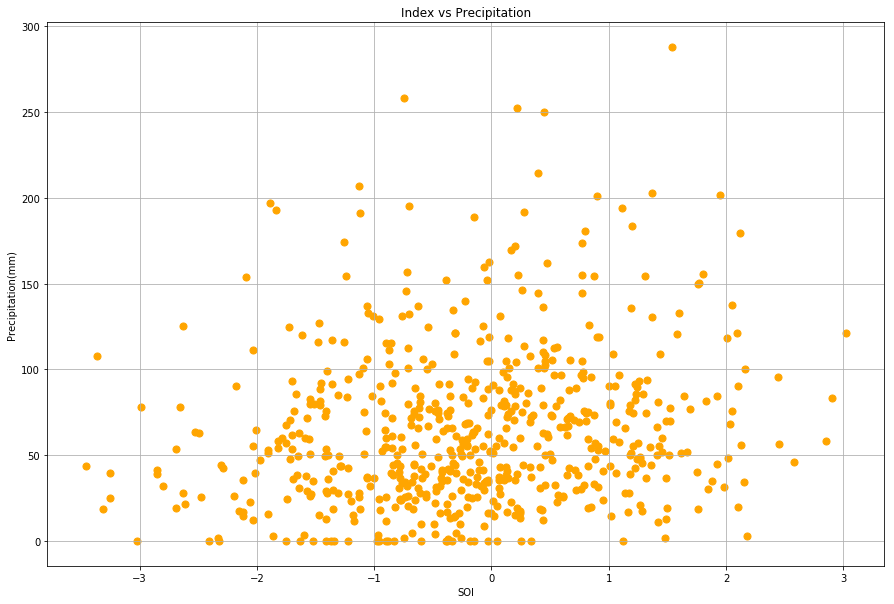

In [76]:
soiIdeamMix = pd.concat([soiAllTime.shift(-3),ideamEstacionAllTime],axis=1)
soiIdeamMix.set_axis(['SOI','Precipitation(mm)'],axis='columns',inplace=True)
soiIdeamMix = soiIdeamMix.dropna()
soiIdeamMix.plot.scatter(0,1,c='orange',grid=True,figsize=(15,10), title= 'Index vs Precipitation',s=50)

## NAO + Aeropuerto Guaymaral

 $ Precipitation_t$ v $Index_{t}$

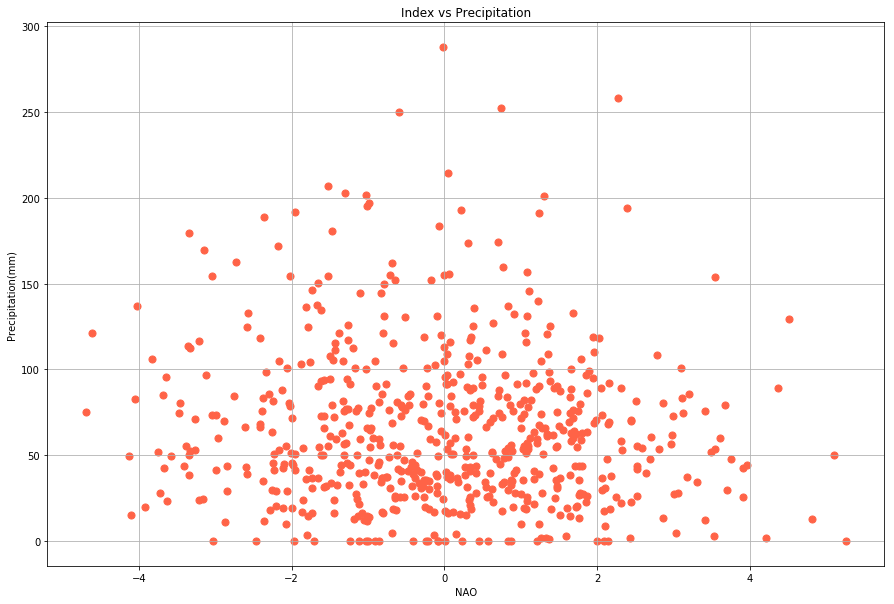

In [66]:
naoIdeamMix = pd.concat([naoAllTime,ideamEstacionAllTime],axis=1)
naoIdeamMix.set_axis(['NAO','Precipitation(mm)'],axis='columns',inplace=True)
naoIdeamMix = naoIdeamMix.dropna()
naoIdeamMix.plot.scatter(0,1,c='tomato',grid=True,figsize=(15,10), title= 'Index vs Precipitation',s=50)

 $ Precipitation_t$ v $Index_{t-1}$

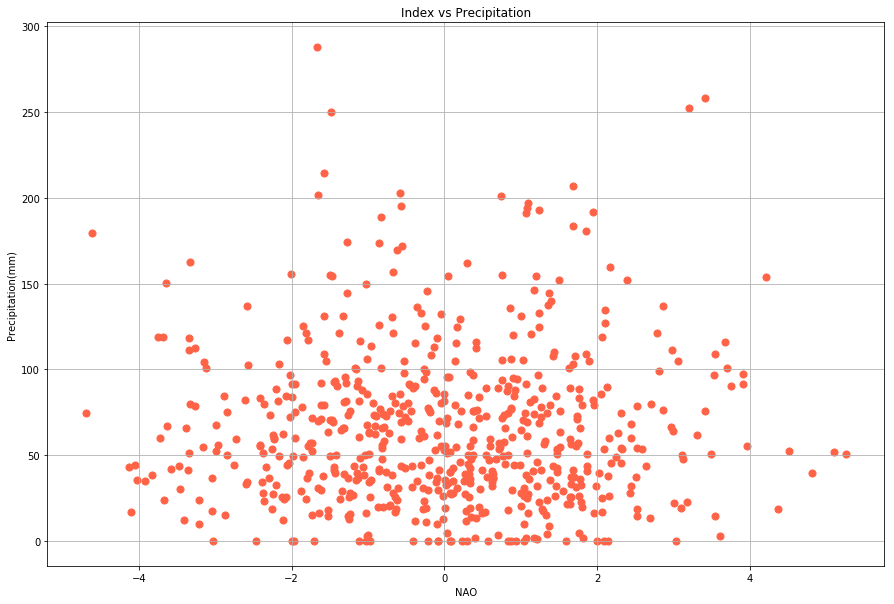

In [77]:
naoIdeamMix = pd.concat([naoAllTime.shift(-1),ideamEstacionAllTime],axis=1)
naoIdeamMix.set_axis(['NAO','Precipitation(mm)'],axis='columns',inplace=True)
naoIdeamMix = naoIdeamMix.dropna()
naoIdeamMix.plot.scatter(0,1,c='tomato',grid=True,figsize=(15,10), title= 'Index vs Precipitation',s=50)

 $ Precipitation_t$ v $Index_{t-2}$

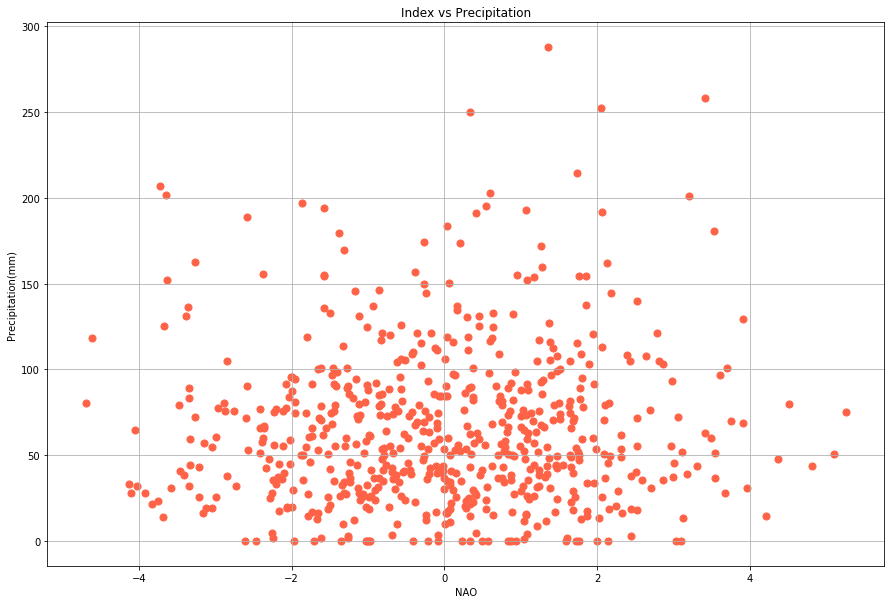

In [78]:
naoIdeamMix = pd.concat([naoAllTime.shift(-2),ideamEstacionAllTime],axis=1)
naoIdeamMix.set_axis(['NAO','Precipitation(mm)'],axis='columns',inplace=True)
naoIdeamMix = naoIdeamMix.dropna()
naoIdeamMix.plot.scatter(0,1,c='tomato',grid=True,figsize=(15,10), title= 'Index vs Precipitation',s=50)

 $ Precipitation_t$ v $Index_{t-3}$

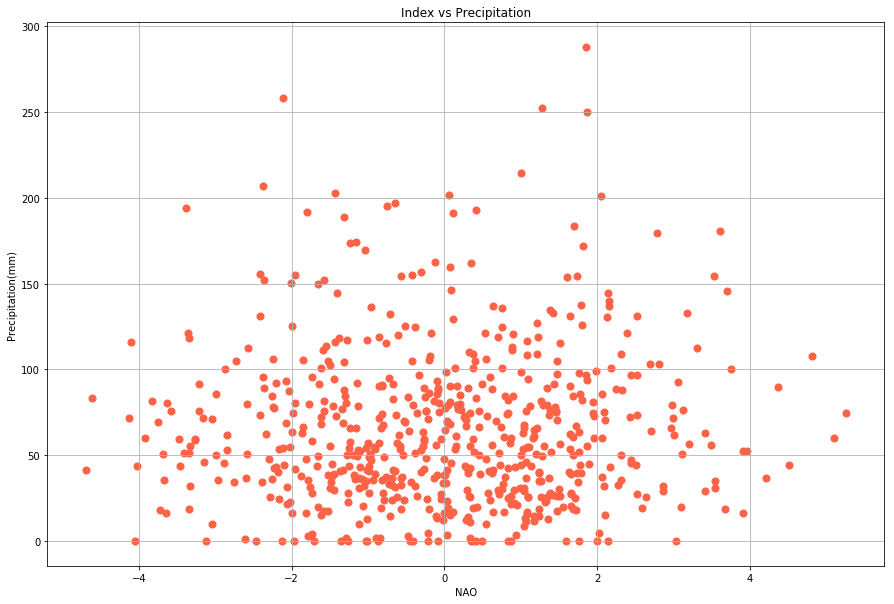

In [79]:
naoIdeamMix = pd.concat([naoAllTime.shift(-3),ideamEstacionAllTime],axis=1)
naoIdeamMix.set_axis(['NAO','Precipitation(mm)'],axis='columns',inplace=True)
naoIdeamMix = naoIdeamMix.dropna()
naoIdeamMix.plot.scatter(0,1,c='tomato',grid=True,figsize=(15,10), title= 'Index vs Precipitation',s=50)

## Niño 3.4 + Aeropuerto Guaymaral

 $ Precipitation_t$ v $Index_{t}$

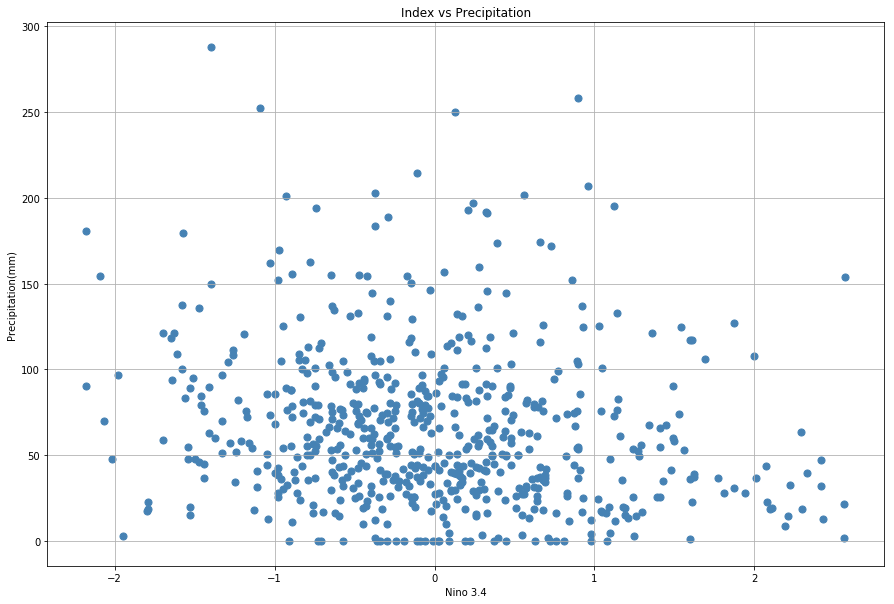

In [62]:
nino34IdeamMix = pd.concat([nino34AllTime,ideamEstacionAllTime],axis=1)
nino34IdeamMix.set_axis(['Nino 3.4','Precipitation(mm)'],axis='columns',inplace=True)
nino34IdeamMix = nino34IdeamMix.dropna()
nino34IdeamMix.plot.scatter(0,1,c='blue',grid=True,figsize=(15,10), title= 'Index vs Precipitation',s=50)

 $ Precipitation_t$ v $Index_{t-1}$

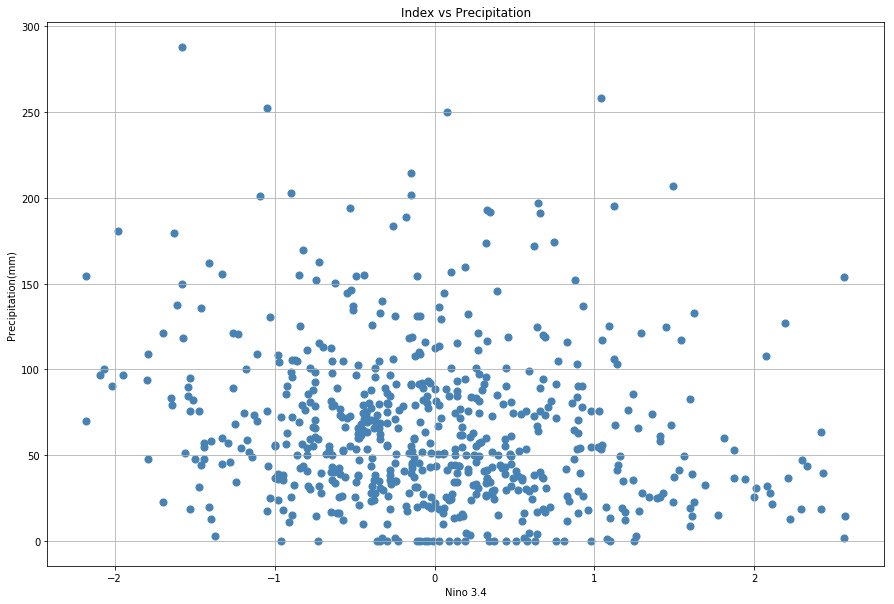

In [80]:
nino34IdeamMix = pd.concat([nino34AllTime.shift(-1),ideamEstacionAllTime],axis=1)
nino34IdeamMix.set_axis(['Nino 3.4','Precipitation(mm)'],axis='columns',inplace=True)
nino34IdeamMix = nino34IdeamMix.dropna()
nino34IdeamMix.plot.scatter(0,1,c='steelblue',grid=True,figsize=(15,10), title= 'Index vs Precipitation',s=50)

 $ Precipitation_t$ v $Index_{t-2}$

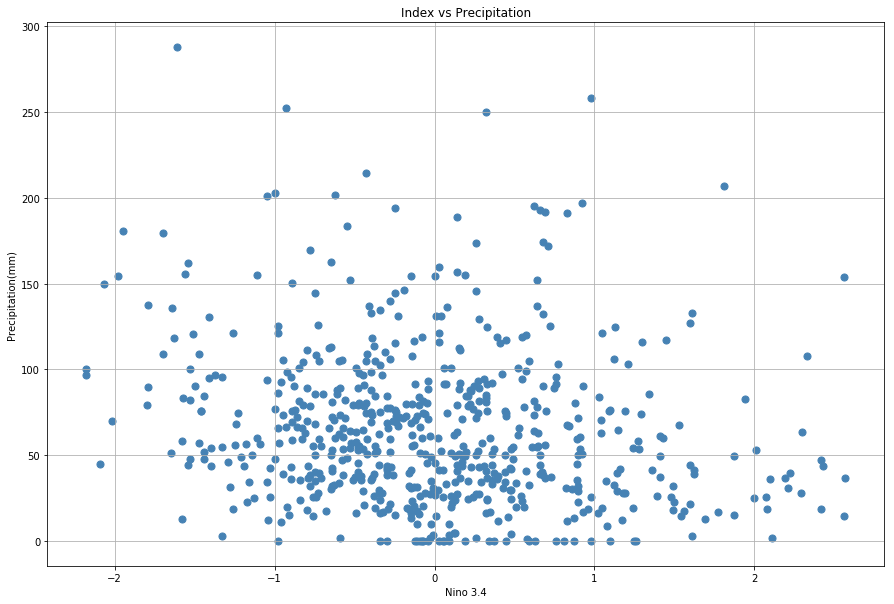

In [81]:
nino34IdeamMix = pd.concat([nino34AllTime.shift(-2),ideamEstacionAllTime],axis=1)
nino34IdeamMix.set_axis(['Nino 3.4','Precipitation(mm)'],axis='columns',inplace=True)
nino34IdeamMix = nino34IdeamMix.dropna()
nino34IdeamMix.plot.scatter(0,1,c='steelblue',grid=True,figsize=(15,10), title= 'Index vs Precipitation',s=50)

 $ Precipitation_t$ v $Index_{t-3}$

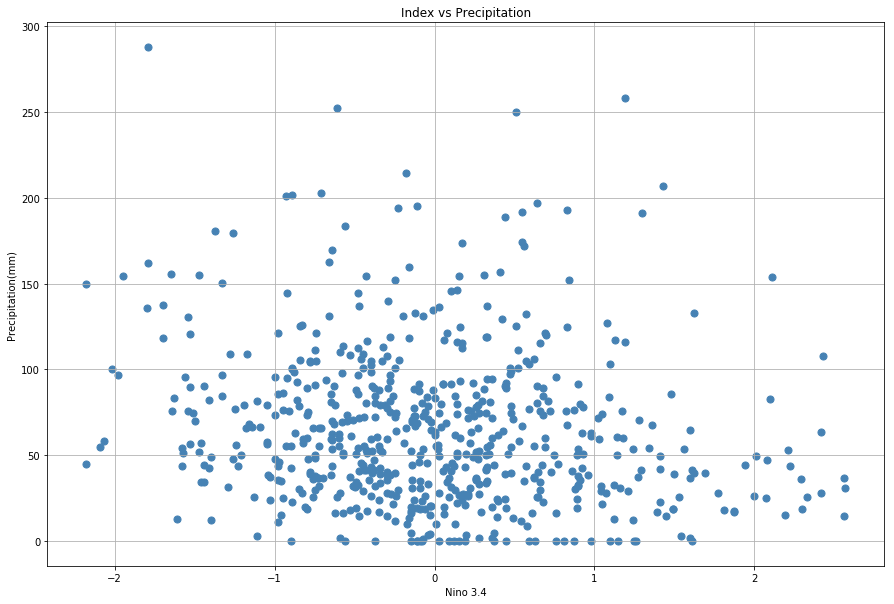

In [82]:
nino34IdeamMix = pd.concat([nino34AllTime.shift(-3),ideamEstacionAllTime],axis=1)
nino34IdeamMix.set_axis(['Nino 3.4','Precipitation(mm)'],axis='columns',inplace=True)
nino34IdeamMix = nino34IdeamMix.dropna()
nino34IdeamMix.plot.scatter(0,1,c='steelblue',grid=True,figsize=(15,10), title= 'Index vs Precipitation',s=50)

# What about $\Delta 's$ ? 


 $ \Delta Precipitation_t$

Text(0.5,0,'$\\Delta Precipitation$')

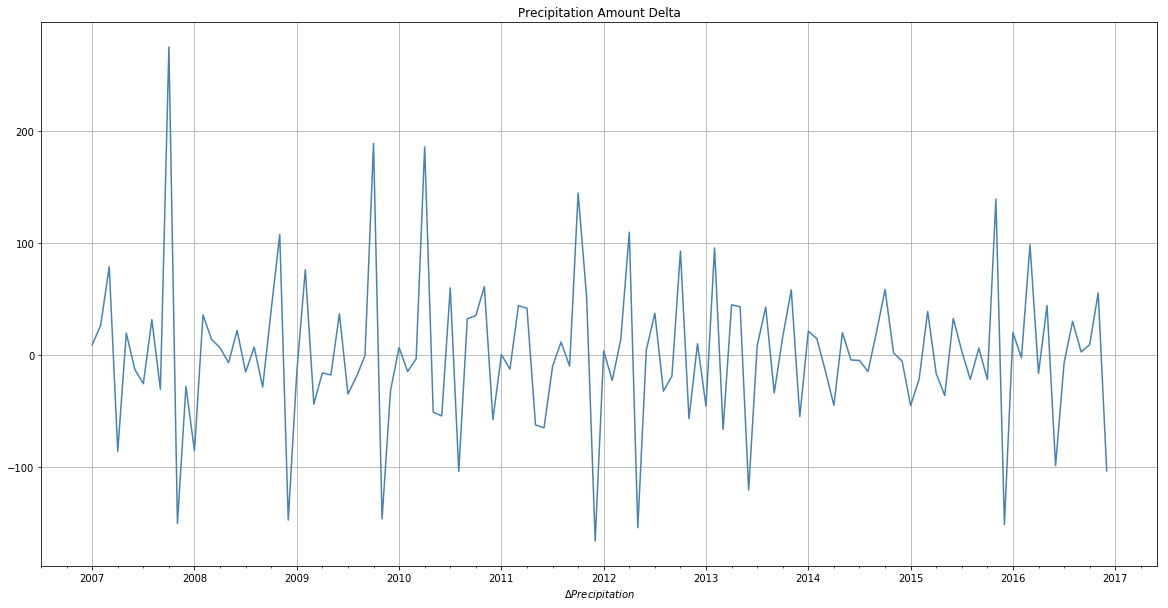

In [96]:
deltaPallTime = ideamEstacionAllTime.diff() 
# Choose only last 5 years.
deltaPTime = pd.Series(deltaPallTime.iloc[-120:])
deltaPTimePlot=deltaPTime.plot(figsize=(20,10),title='Precipitation Amount Delta', grid=True,color='steelblue')
deltaPTimePlot.set_xlabel('Year')
deltaPTimePlot.set_xlabel('$\Delta Precipitation$')

 $ \Delta SOI_t$

Text(0,0.5,'$\\Delta SOI$')

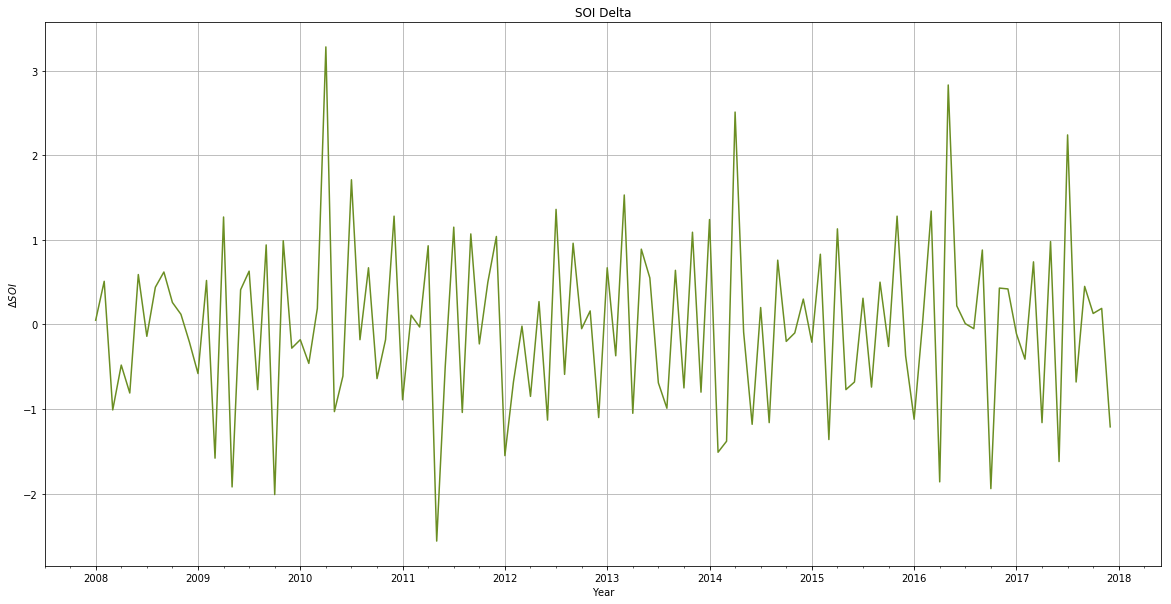

In [97]:
deltaSoiAllTime = soiAllTime.diff() 
# Choose only last 5 years.
deltaSoiTime = pd.Series(deltaSoiAllTime.iloc[-120:])
deltaSoiTimePlot=deltaSoiTime.plot(figsize=(20,10),title='SOI Delta', grid=True,color='olivedrab')
deltaSoiTimePlot.set_xlabel('Year')
deltaSoiTimePlot.set_ylabel('$\Delta SOI$')

 $ \Delta NAO_t$

Text(0,0.5,'$\\Delta NAO$')

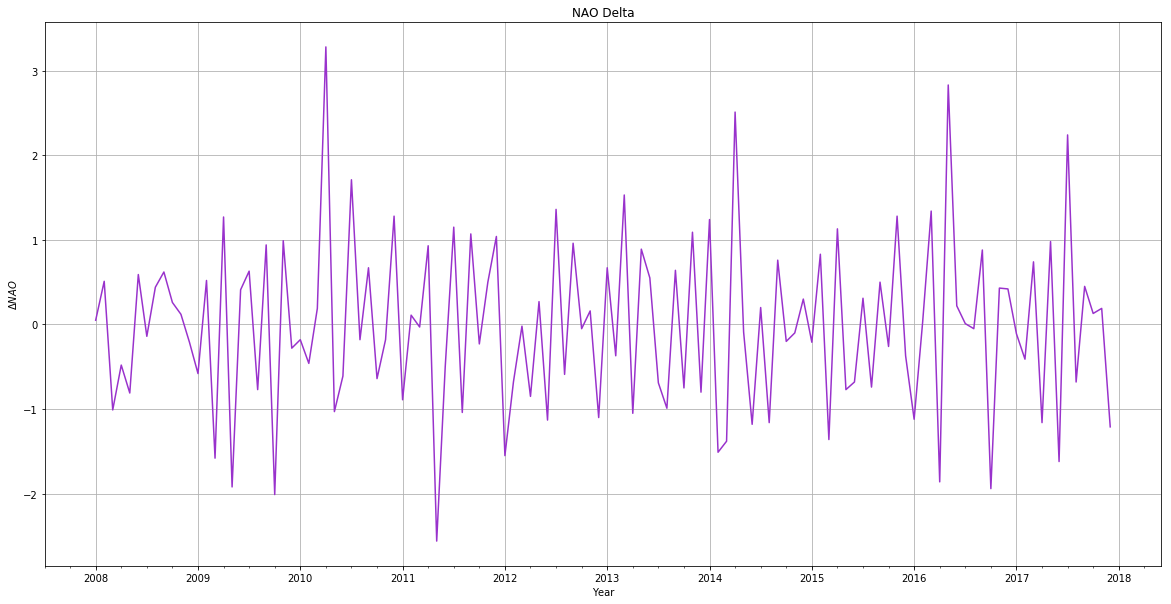

In [98]:
deltaNaoAllTime = soiAllTime.diff() 
# Choose only last 5 years.
deltaNaoTime = pd.Series(deltaNaoAllTime.iloc[-120:])
deltaNaoTimePlot=deltaNaoTime.plot(figsize=(20,10),title='NAO Delta', grid=True,color='darkorchid')
deltaNaoTimePlot.set_xlabel('Year')
deltaNaoTimePlot.set_ylabel('$\Delta NAO$')

 $ \Delta Niño3.4_t$

Text(0,0.5,'$\\Delta Nino34$')

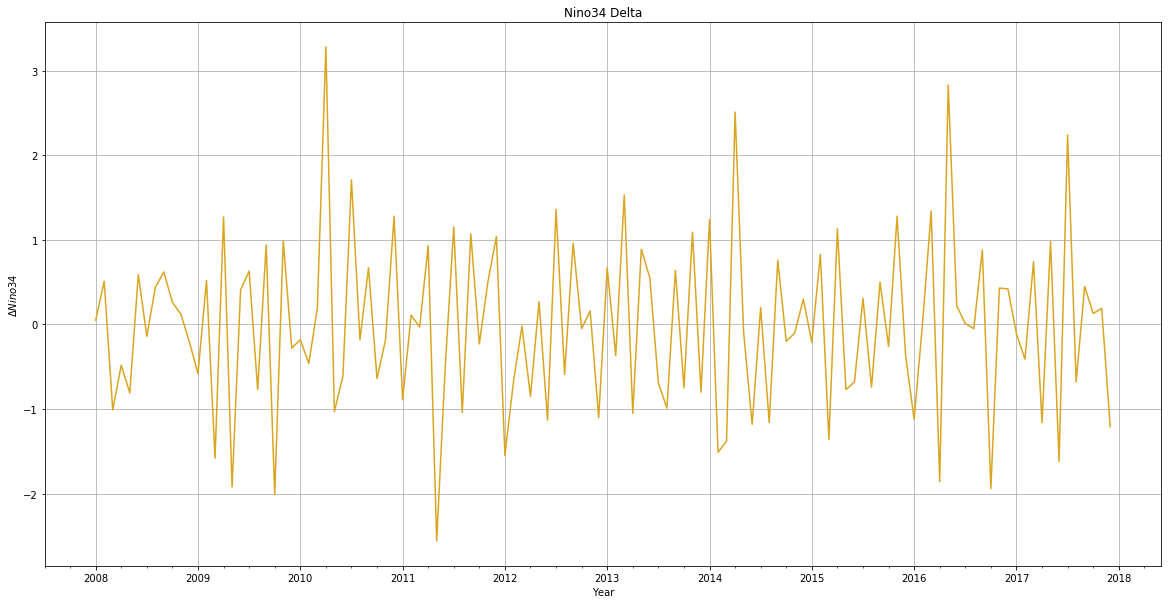

In [99]:
deltaNino34AllTime = soiAllTime.diff() 
# Choose only last 5 years.
deltaNino34Time = pd.Series(deltaNaoAllTime.iloc[-120:])
deltaNino34TimePlot=deltaNaoTime.plot(figsize=(20,10),title='Nino34 Delta', grid=True,color='goldenrod')
deltaNino34TimePlot.set_xlabel('Year')
deltaNino34TimePlot.set_ylabel('$\Delta Nino34$')

 $ \Delta Precipitation_t$ v $\Delta NINO3.4_{t}$

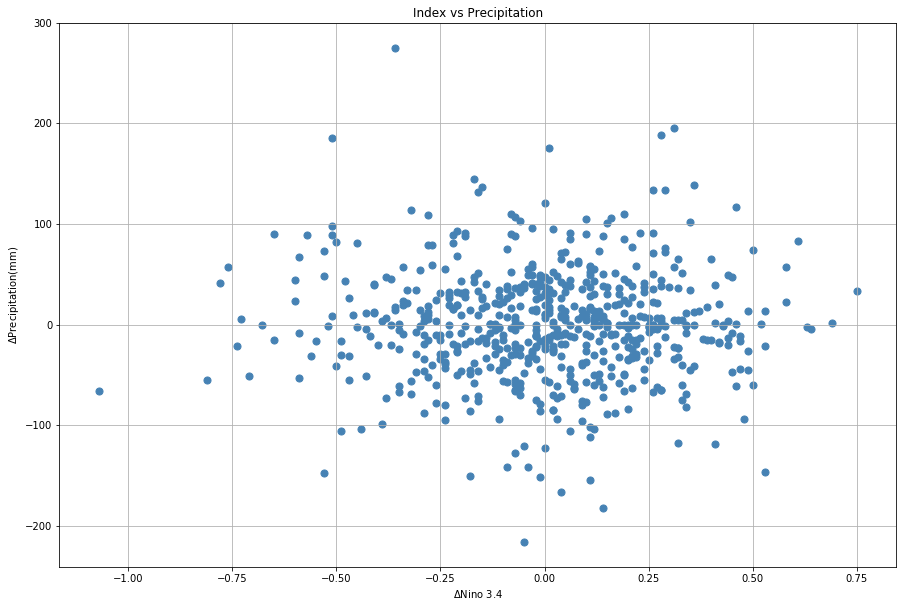

In [100]:
nino34IdeamMixDeltas = pd.concat([nino34AllTime.diff(),ideamEstacionAllTime.diff()],axis=1)
nino34IdeamMixDeltas.set_axis(['$\Delta$Nino 3.4','$\Delta$Precipitation(mm)'],axis='columns',inplace=True)
nino34IdeamMixDeltas = nino34IdeamMixDeltas.dropna()
nino34IdeamMixDeltas.plot.scatter(0,1,c='steelblue',grid=True,figsize=(15,10), title= 'Index vs Precipitation',s=50)

 $ \Delta Precipitation_t$ v $\Delta NINO3.4_{t-1}$

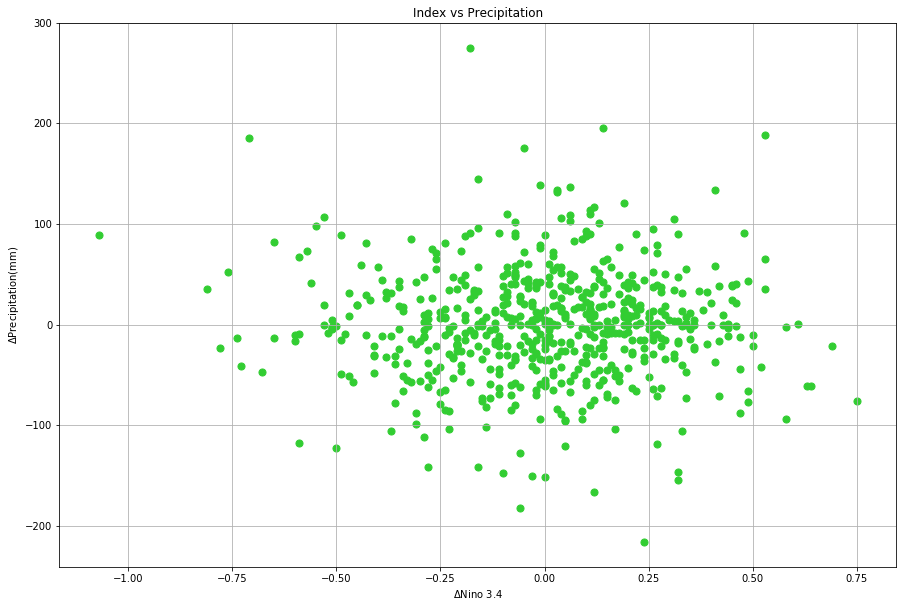

In [105]:
nino34IdeamMixDeltas = pd.concat([nino34AllTime.shift(-1).diff(),ideamEstacionAllTime.diff()],axis=1)
nino34IdeamMixDeltas.set_axis(['$\Delta$Nino 3.4','$\Delta$Precipitation(mm)'],axis='columns',inplace=True)
nino34IdeamMixDeltas = nino34IdeamMixDeltas.dropna()
nino34IdeamMixDeltas.plot.scatter(0,1,c='limegreen',grid=True,figsize=(15,10), title= 'Index vs Precipitation',s=50)

 $ \Delta Precipitation_t$ v $\Delta NINO3.4_{t-2}$

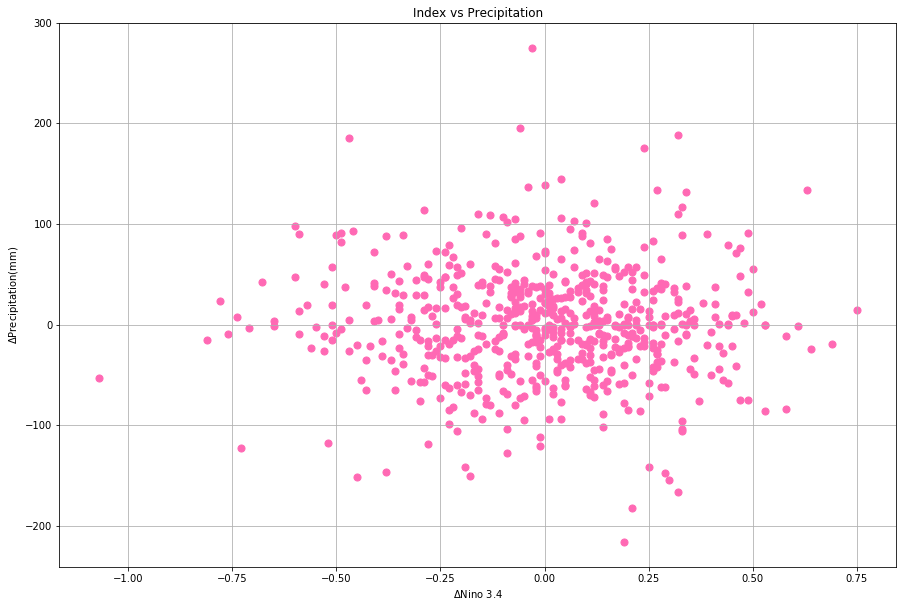

In [103]:
nino34IdeamMixDeltas = pd.concat([nino34AllTime.shift(-2).diff(),ideamEstacionAllTime.diff()],axis=1)
nino34IdeamMixDeltas.set_axis(['$\Delta$Nino 3.4','$\Delta$Precipitation(mm)'],axis='columns',inplace=True)
nino34IdeamMixDeltas = nino34IdeamMixDeltas.dropna()
nino34IdeamMixDeltas.plot.scatter(0,1,c='hotpink',grid=True,figsize=(15,10), title= 'Index vs Precipitation',s=50)

In [108]:
soi.head()

Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec  \
1866 -0.62 -0.12 -0.62 -0.65  0.04 -0.82 -0.34  0.36 -0.18  0.07  1.10 -0.16   
1867  0.09 -0.01 -0.09  0.83  0.50 -0.48  0.44  0.34  0.12 -0.56 -0.65 -0.89   
1868 -0.16 -0.34 -1.56  0.30 -1.34 -2.20 -0.40 -1.41 -1.23 -1.24 -1.49  0.52   
1869 -1.90 -0.26 -0.59  2.12  1.40  1.53  1.42  0.94  0.12  0.85  0.56  0.42   
1870  1.06  0.18 -0.75  0.47 -0.11 -1.10  0.17  0.98 -0.00 -0.58 -0.86 -1.29   

      Anual  
1866  -0.16  
1867  -0.03  
1868  -0.88  
1869   0.55  
1870  -0.15

In [109]:
meanSOI = soi.mean(axis=0)

In [110]:
meanSOI

Jan      0.026974
Feb     -0.063816
Mar     -0.143487
Apr     -0.009539
May     -0.038355
Jun     -0.154013
Jul      0.056316
Aug     -0.212763
Sep      0.014474
Oct     -0.138553
Nov     -0.067500
Dec      0.052171
Anual   -0.056382
dtype: float64